In [52]:
import os
import sys
sys.path.append(os.path.abspath(".."))

In [53]:
from utils.data_loader import load_cifar10

root_folder = './../data/CIFAR-10/cifar-10-batches-py'  
X_train, y_train, X_test, y_test = load_cifar10(root_folder)

print("Train images shape:", X_train.shape)   # (50000, 32, 32, 3)
print("Train labels shape:", y_train.shape)   # (50000,)
print("Test images shape:", X_test.shape)     # (10000, 32, 32, 3)
print("Test labels shape:", y_test.shape)     # (10000,)

Train images shape: (50000, 32, 32, 3)
Train labels shape: (50000,)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000,)


In [54]:
# Normalize pixel values to 0-1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

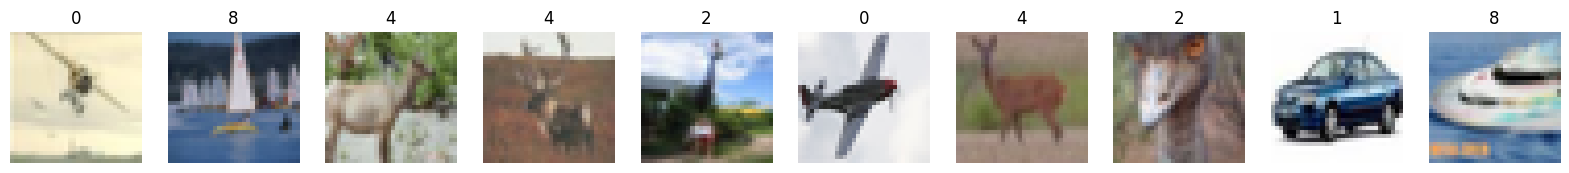

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def plot_cifar_samples(images, labels, num_samples=10):
    indices = np.random.choice(len(images), num_samples, replace=False)
    plt.figure(figsize=(num_samples*2, 2))
    for i, idx in enumerate(indices):
        plt.subplot(1, num_samples, i+1)
        plt.imshow(images[idx])
        plt.title(f"{labels[idx]}")
        plt.axis("off")
    plt.show()

plot_cifar_samples(X_train, y_train)

In [56]:
from utils.train_utils import train_model

# Train with the correct input shape for CIFAR-10: (32, 32, 3)
lenet, lenet_history = train_model(
    train_images=X_train, 
    train_labels=y_train, 
    test_images=X_test, 
    test_labels=y_test,  
    model_name="lenet", 
    epochs=10, 
    batch_size=32, 
    input_shape=(32, 32, 3)
)

c:\Users\sonia\anaconda3\envs\fragile_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 0.3509 - loss: 1.7761 - val_accuracy: 0.4543 - val_loss: 1.5144
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.5191 - loss: 1.3549 - val_accuracy: 0.5575 - val_loss: 1.2479
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 27s 17ms/step - accuracy: 0.5668 - loss: 1.2109 - val_accuracy: 0.5605 - val_loss: 1.2251
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 30s 19ms/step - accuracy: 0.6034 - loss: 1.1179 - val_accuracy: 0.6046 - val_loss: 1.1238
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.6306 - loss: 1.0480 - val_accuracy: 0.6062 - val_loss: 1.1146
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6563 - loss: 0.9713 - val_accuracy: 0.6270 - val_loss: 1.0756
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6778 - loss: 0.9174 - val_accuracy: 0.6264 - val_loss: 1.0897
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.6907 -

In [57]:
np.random.seed(7)
subset_size = 100
all_indices = np.arange(len(X_train))
subset_indices = np.random.choice(all_indices, subset_size, replace=False)
train_images_subset = X_train[subset_indices]
train_labels_subset = y_train[subset_indices]

In [58]:
from utils.ground_truth_influence import compute_ground_truth_influences

# Select a test sample 
test_index = 4
test_sample = X_test[test_index]
test_label = y_test[test_index]

ground_truth_influences = compute_ground_truth_influences(
    lenet, train_images_subset, train_labels_subset, test_sample, test_label,
    sample_indices=list(range(subset_size)), fine_tune_epochs=10, batch_size=128
)

print(ground_truth_influences)

[ 0.1222567   0.22135419  0.22385705  0.24265397  0.22692323  0.20048273
  0.13211656  0.2300421   0.19648135  0.15519583  0.20423156  0.46654528
  0.21534932  0.19655085  0.19459909 -0.01134044  0.19864744  0.1846574
  0.19551235  0.1887086   0.2199974   0.31500566  0.135836    0.23801053
  0.19928151  0.19850594  0.2640937   0.25076032  0.23911488  0.22301018
  0.13943428  0.28461087  0.24187708  0.11297488  0.26038408  0.19827533
  0.23806     0.21401745  0.3231228   0.16565114  0.26095206  0.27748495
  0.36384082  0.23927087  0.1330117   0.22025251  0.20205498  0.19467014
  0.19438875  0.2603206   0.20519865  0.21802843  0.1769104   0.2224611
  0.2138238   0.18731391  0.19976163  0.2789312   0.20155925  0.21889484
  0.17660415  0.1954084   0.18850845  0.21827173  0.26111275  0.22737741
  0.27441514  0.17816228  0.11024344  0.2619273   0.13359392  0.27320105
  0.18606716  0.24529064  0.12940705  0.16241872  0.16927129  0.21620011
  0.2699269   0.19646305  0.6541316   0.20179164  0.2

In [59]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr
import tensorflow as tf

from utils.influence_functions import compute_influence_and_meta_on_dataset

# Define loss function
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()

# Compute standard influence estimates on a subset of training data (first 10 samples)
std_influences, meta_influences = compute_influence_and_meta_on_dataset(
    lenet, train_images_subset, train_labels_subset, test_sample, test_label, loss_fn,
    damping=0.1, sample_indices=list(range(subset_size)), epsilon=1e-3
)

std_influences = -std_influences

scaling_factor = np.median(np.abs(ground_truth_influences)) / np.median(np.abs(std_influences))
std_influences = std_influences * scaling_factor

print(std_influences)

[ 7.08320141e-01  2.19809636e-02 -6.78361300e-03  1.40448749e-01
 -5.27620792e-01 -7.26704895e-02 -8.49717915e-01 -2.54828244e-01
  3.01752356e-04 -4.13481444e-01  1.51416257e-01  4.02349867e-02
 -6.34644255e-02  1.54727476e-03 -1.57212347e-01  1.93581164e+00
 -6.13051327e-03 -1.90059379e-01 -1.56572580e-01 -7.58306822e-03
 -5.04901865e-03 -5.94486654e-01  6.26204252e-01  1.51128531e-01
 -3.34607880e-03  2.79385527e-03  7.28437543e-01 -1.61824062e-01
  8.81470442e-02 -6.90859556e-01 -9.04180706e-01 -1.64303875e+00
 -4.75090146e-01  2.51264982e-02 -7.62962461e-01  4.68706805e-03
  1.14293730e+00 -1.97274849e-01  4.54722717e-02  1.24775358e-01
 -6.51302218e-01  1.14836514e-01  3.29842150e-01 -4.27421123e-01
  3.15231979e-01  6.75005674e-01 -4.22902852e-01 -1.44221978e-02
  1.85217232e-01 -2.17865855e-01  1.72758371e-01  1.26594126e-01
 -3.62347841e-01  2.49193981e-04  1.55256942e-01  1.63733041e+00
  7.08327830e-01 -1.75849855e+00 -7.99271166e-02 -7.94203043e-01
  2.87500583e-02 -7.95603

In [60]:
meta_influences = -meta_influences*scaling_factor
print(meta_influences)

[-1.27770176e+01  5.43830872e-01  2.54095292e+00  1.32680674e+01
  1.83612175e+01 -2.59108543e+00 -1.58619089e+01 -2.51209373e+01
 -5.85649721e-03 -8.02738571e+00  1.53462827e+00  2.85988159e+01
 -1.15613775e+01  3.19596492e-02  6.34347200e+00  3.18772717e+01
  1.23874211e+00  9.48730373e+00  1.56699443e+00 -4.57142323e-01
 -1.12826243e-01 -6.98511267e+00 -1.85897434e+00 -3.58178940e+01
 -2.72104554e-02 -3.69193479e-02 -1.87215853e+00 -1.21554148e+00
  4.39684582e+00 -1.02724495e+01  1.77813282e+01 -2.96453209e+01
  1.05081833e+02 -2.90834212e+00 -1.19953318e+01  9.45195276e-03
 -2.08270988e+01 -3.22959274e-01 -8.66947460e+00  1.41586418e+01
 -3.07098556e+00 -1.45763934e+00 -3.19006691e+01 -3.20351219e+00
 -9.68517590e+00  8.18408356e+01 -6.31181717e+00  4.19603968e+00
  1.51861620e+00 -1.97066200e+00 -2.04371548e+00  1.71060600e+01
 -2.79321671e+00 -9.51213539e-01 -1.54327192e+01 -5.79874992e+00
  5.21893203e-01  2.87734337e+01 -5.24139214e+00 -1.24944572e+01
 -2.93900609e+00  2.09802

In [61]:
pearson_corr, _ = pearsonr(std_influences, ground_truth_influences)
spearman_corr, _ = spearmanr(std_influences, ground_truth_influences)
print("Pearson correlation:", pearson_corr)
print("Spearman correlation:", spearman_corr)

Pearson correlation: -0.09518071
Spearman correlation: -0.04645664566456645


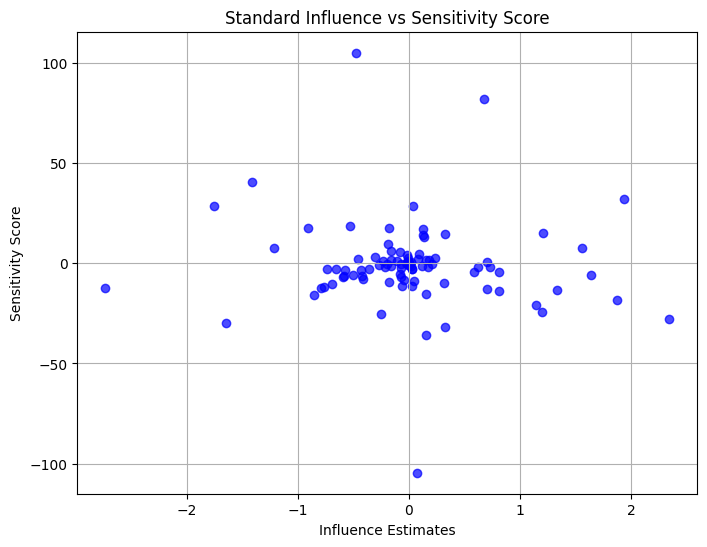

In [62]:
plt.figure(figsize=(8,6))
plt.scatter(std_influences, meta_influences, color='blue', alpha=0.7)
plt.xlabel("Influence Estimates")
plt.ylabel("Sensitivity Score")
plt.title("Standard Influence vs Sensitivity Score")
plt.grid(True)
plt.show()

In [63]:
top_k = 10
top_indices = np.argsort(np.abs(std_influences))[-top_k:][::-1]  # Sort by magnitude (descending)

def plot_top_influential(images, labels, scores, meta_scores, indices, title, variant="normal"):
    plt.figure(figsize=(top_k, 2.5))
    for i, idx in enumerate(indices):
        plt.subplot(1, top_k, i + 1)
        plt.imshow(images[idx])
        if(variant == "adjusted"):
            plt.title(f"Inf:{scores[idx]:.2f}\nPrev={meta_scores[idx]:.2f}", fontsize=8)
        else:
            plt.title(f"Inf:{scores[idx]:.2f}\nμ={meta_scores[idx]:.2f}", fontsize=8)
        plt.axis("off")
    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()

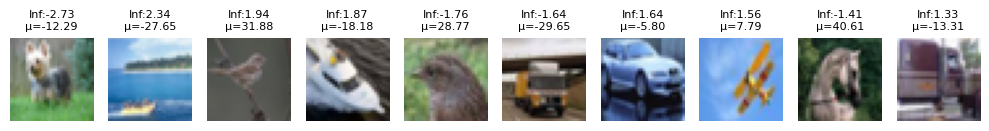

In [64]:
plot_top_influential(train_images_subset, train_labels_subset, std_influences, meta_influences, top_indices, "")

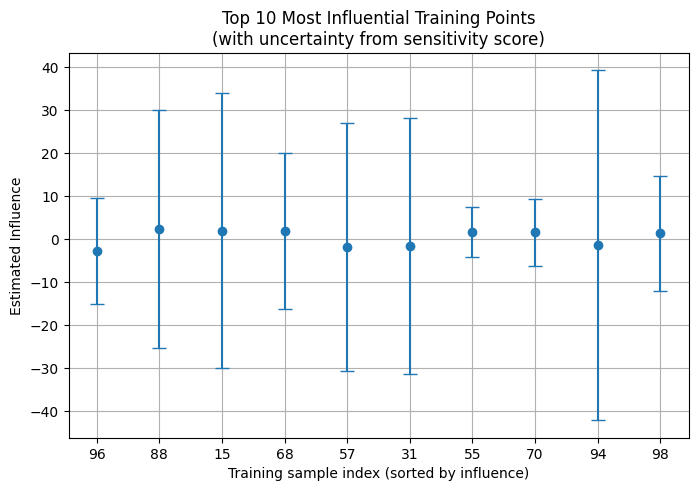

In [65]:
import numpy as np
import matplotlib.pyplot as plt

top10_std = std_influences[top_indices]
top10_meta = meta_influences[top_indices]

plt.figure(figsize=(8, 5))
plt.errorbar(np.arange(10), top10_std, yerr=np.abs(top10_meta), fmt='o', capsize=5)
plt.xticks(np.arange(10), top_indices)
plt.xlabel("Training sample index (sorted by influence)")
plt.ylabel("Estimated Influence")
plt.title("Top 10 Most Influential Training Points\n(with uncertainty from sensitivity score)")
plt.grid(True)
plt.show()


Best Pearson threshold: 0.010 (r = 1.000)
Best Spearman threshold: 0.010 (ρ = 1.000)
Best Trade-off threshold: 0.010 (r = 1.000, ρ = 1.000)


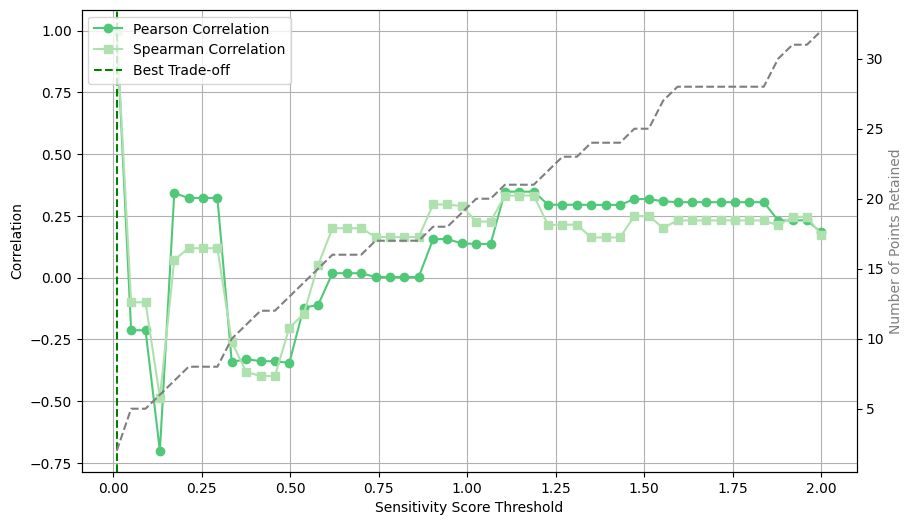

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

thresholds = np.linspace(0.01, 2.0, 50)
pearson_corrs = []
spearman_corrs = []
num_points_retained = []

for t in thresholds:
    mask = np.abs(meta_influences) < t
    retained = np.sum(mask)
    num_points_retained.append(retained)

    if retained < 2:
        pearson_corrs.append(np.nan)
        spearman_corrs.append(np.nan)
    else:
        std_filtered = std_influences[mask]
        gt_filtered = ground_truth_influences[mask]
        p_corr, _ = pearsonr(std_filtered, gt_filtered)
        s_corr, _ = spearmanr(std_filtered, gt_filtered)
        pearson_corrs.append(p_corr)
        spearman_corrs.append(s_corr)

# Find best
pearson_corrs = np.array(pearson_corrs)
spearman_corrs = np.array(spearman_corrs)

best_pearson_idx = np.nanargmax(pearson_corrs)
best_spearman_idx = np.nanargmax(spearman_corrs)

# Trade-off: Spearman + Pearson
combined = pearson_corrs + spearman_corrs
best_tradeoff_idx = np.nanargmax(combined)

print(f"Best Pearson threshold: {thresholds[best_pearson_idx]:.3f} (r = {pearson_corrs[best_pearson_idx]:.3f})")
print(f"Best Spearman threshold: {thresholds[best_spearman_idx]:.3f} (ρ = {spearman_corrs[best_spearman_idx]:.3f})")
print(f"Best Trade-off threshold: {thresholds[best_tradeoff_idx]:.3f} (r = {pearson_corrs[best_tradeoff_idx]:.3f}, ρ = {spearman_corrs[best_tradeoff_idx]:.3f})")

fig, ax1 = plt.subplots(figsize=(10, 6))

color1 = '#50C878'
ax1.set_xlabel("Sensitivity Score Threshold")
ax1.set_ylabel("Correlation", color="#000000")
ax1.plot(thresholds, pearson_corrs, label="Pearson Correlation", marker="o", color=color1)
ax1.plot(thresholds, spearman_corrs, label="Spearman Correlation", marker="s", color="#AFE1AF")
ax1.axvline(thresholds[best_tradeoff_idx], linestyle='--', color='green', label='Best Trade-off')
ax1.tick_params(axis='y', labelcolor="#000000")
ax1.legend(loc="upper left")
ax1.grid(True)

ax2 = ax1.twinx()
color2 = 'tab:gray'
ax2.set_ylabel("Number of Points Retained", color=color2)
ax2.plot(thresholds, num_points_retained, label="# Points Retained", linestyle="--", color=color2)


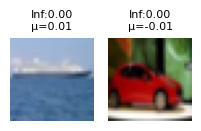

In [67]:
best_mask = np.abs(meta_influences) < thresholds[best_tradeoff_idx]

filtered_std = std_influences[best_mask]
filtered_meta = meta_influences[best_mask]
filtered_images = train_images_subset[best_mask]
filtered_labels = train_labels_subset[best_mask]

top_indices = np.argsort(np.abs(filtered_std))[-top_k:][::-1]

plot_top_influential(filtered_images, filtered_labels, filtered_std, filtered_meta, top_indices, title="")


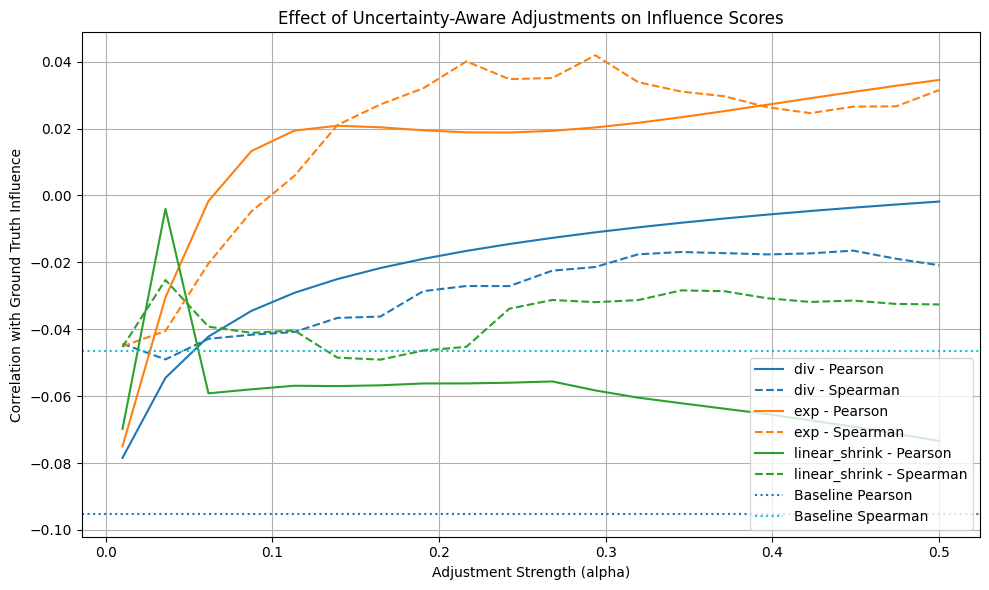

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

adjustment_strengths = np.linspace(0.01, 0.5, 20)
strategies = ['div', 'exp', 'linear_shrink']

results = {s: {'pearson': [], 'spearman': []} for s in strategies}

for alpha in adjustment_strengths:
    # Strategies
    adj1 = std_influences / (1 + alpha * np.abs(meta_influences))  
    adj2 = std_influences * np.exp(-alpha * np.abs(meta_influences))  
    adj3 = std_influences * np.clip((1 - alpha * np.abs(meta_influences)), 0.2, 1.0)  # linear_shrink

    for name, adj in zip(strategies, [adj1, adj2, adj3]):
        p_corr, _ = pearsonr(adj, ground_truth_influences)
        s_corr, _ = spearmanr(adj, ground_truth_influences)
        results[name]['pearson'].append(p_corr)
        results[name]['spearman'].append(s_corr)

# Baseline
pearson_base, _ = pearsonr(std_influences, ground_truth_influences)
spearman_base, _ = spearmanr(std_influences, ground_truth_influences)

strategy_colors = {
    'div': 'tab:blue',
    'exp': 'tab:orange',
    'linear_shrink': 'tab:green'
}

# Plotting
plt.figure(figsize=(10, 6))
for name in strategies:
    color = strategy_colors[name]
    # Plot Pearson with solid line
    plt.plot(adjustment_strengths, results[name]['pearson'], 
             color=color, linestyle='-', label=f'{name} - Pearson')
    # Plot Spearman with dashed line using the same color
    plt.plot(adjustment_strengths, results[name]['spearman'], 
             color=color, linestyle='--', label=f'{name} - Spearman')

# Baseline lines (unchanged from original)
plt.axhline(pearson_base, linestyle=':', color='tab:blue', label='Baseline Pearson')
plt.axhline(spearman_base, linestyle=':', color='tab:cyan', label='Baseline Spearman')

plt.xlabel("Adjustment Strength (alpha)")
plt.ylabel("Correlation with Ground Truth Influence")
plt.title("Effect of Uncertainty-Aware Adjustments on Influence Scores")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Best alpha: 0.5
Associated Pearson score: 0.03452892887582091
Associated Spearman score: 0.03147914791479148


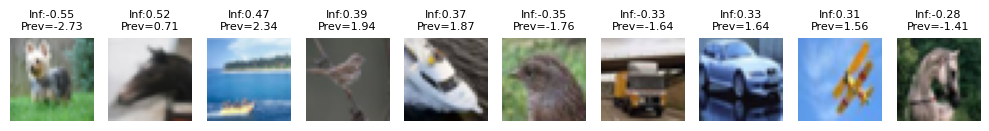

In [70]:
strategy = "exp"
avg_corrs = np.array(results[strategy]['pearson']) + np.array(results[strategy]['spearman'])
best_idx = np.argmax(avg_corrs)
best_alpha = adjustment_strengths[best_idx]

best_pearson = results[strategy]['pearson'][best_idx]
best_spearman = results[strategy]['spearman'][best_idx]

print("Best alpha:", best_alpha)
print("Associated Pearson score:", best_pearson)
print("Associated Spearman score:", best_spearman)

adjusted_scores = std_influences * np.clip((1 - best_alpha * np.abs(meta_influences)), 0.2, 1.0)

top_indices = np.argsort(-np.abs(adjusted_scores))[:top_k]
plot_top_influential(train_images_subset, train_labels_subset, adjusted_scores, std_influences, top_indices, title="", variant="adjusted")
